In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [37]:
df=pd.read_csv('processed.csv')
print('Data shape:',df.shape)

Data shape: (1069, 22)


In [38]:
list(enumerate(df.columns))

[(0, 'w/b'),
 (1, 'Water'),
 (2, 'Cement type'),
 (3, 'Cement'),
 (4, 'Slag'),
 (5, 'Fly ash'),
 (6, 'Silica fume'),
 (7, 'Lime filler'),
 (8, 'FA'),
 (9, 'CA'),
 (10, 'Plasticizer'),
 (11, 'Superplasticizer'),
 (12, 'Air entraining'),
 (13, 'Comp. str. test age'),
 (14, 'Compressive strength'),
 (15, 'Air content'),
 (16, 'Spreed'),
 (17, 'Slump'),
 (18, 'Fresh density'),
 (19, 'Dry  density'),
 (20, 'Migration test age'),
 (21, 'Migration resistance')]

1-hot encoding

In [39]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X=ct.fit_transform(df)
# remove dummy variable and output
y=X[:,-1]
X=X[:,1:-1]
print(X.shape)
print(y.shape)

(1069, 30)
(1069,)


SVM Classifier

Split 0:
{'C': 0.001, 'gamma': 10.0, 'kernel': 'poly'}
0.790643274853801
Split 1:
{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.815204678362573
Split 2:
{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.8222222222222222
Split 3:
{'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
0.7976608187134503
Split 4:
{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.8084863321093432
Test acc: 0.880281690140845
Train acc: 0.9920497895829918


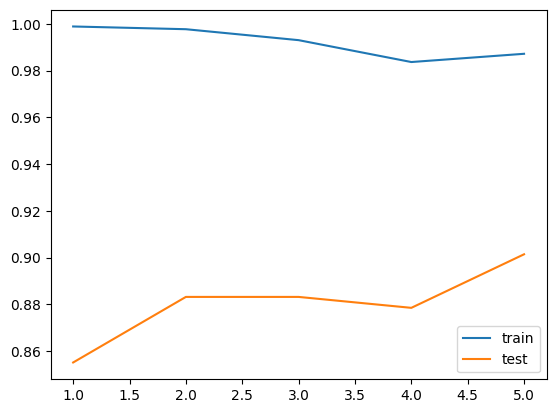

In [34]:
acc_train=[]
acc_test=[]
param_grid={
    'kernel': ['rbf','sigmoid','linear','poly'],
    'C': np.power(10,range(-3,3),dtype=float),
    'gamma': list(np.power(10,range(-3,3),dtype=float)) + ['scale','auto']
}
splits=list(KFold(shuffle=True,random_state=0).split(X,y))
i=0
for train_index, test_index in splits:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    clf = SVC(random_state=0,max_iter=int(1e5))
    grid=GridSearchCV(clf,param_grid,cv=5,n_jobs=4,scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Split {i}:")
    print(grid.best_params_)
    print(grid.best_score_)
    acc_train.append(accuracy_score(y_train,grid.predict(X_train)))
    acc_test.append(accuracy_score(y_test,grid.predict(X_test)))
    i+=1
print('Test acc:',np.mean(acc_test))
print('Train acc:',np.mean(acc_train))
plt.plot(range(1,6),acc_train)
plt.plot(range(1,6),acc_test)
plt.legend(['train','test'])